# Student Performance Analysis

## Overview
This project implements a predictive model to analyze and forecast student academic performance based on various influential factors. The model takes into account multiple parameters including:
- Study hours
- Previous academic scores
- Sleep duration
- Extra-curricular participation

## Methodology
The analysis employs Multiple Linear Regression, a statistical technique that allows us to understand the relationship between multiple independent variables and a dependent variable (student performance in this case).

## Dataset
The analysis utilizes the "Student Performance Dataset" from Kaggle, which provides comprehensive data for building and validating our predictive model. Dataset source: [Student Performance Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

## Objectives
- Develop a reliable predictive model for student performance
- Identify key factors that influence academic success
- Provide insights for educational institutions and students
- Enable data-driven decision making in educational planning

In [58]:
#import the necessary libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#load the dataset
df = pd.read_csv("Student_Performance.csv")




The dataset contains a column called "Extracurricular Activities" which is a string variable ("yes" or "no"). However, in order to use Linear regression we need a numerical value. Thus we first need to encode the column into a numerical value

In [70]:
X = df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]] 
y = df[["Performance Index"]]

#Encode Extra Curricular Activities
X.loc[:, "Extracurricular Activities"] = X["Extracurricular Activities"].map({"Yes":1,"No":0})


Next we need to split our dataset into training & test data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 4.08


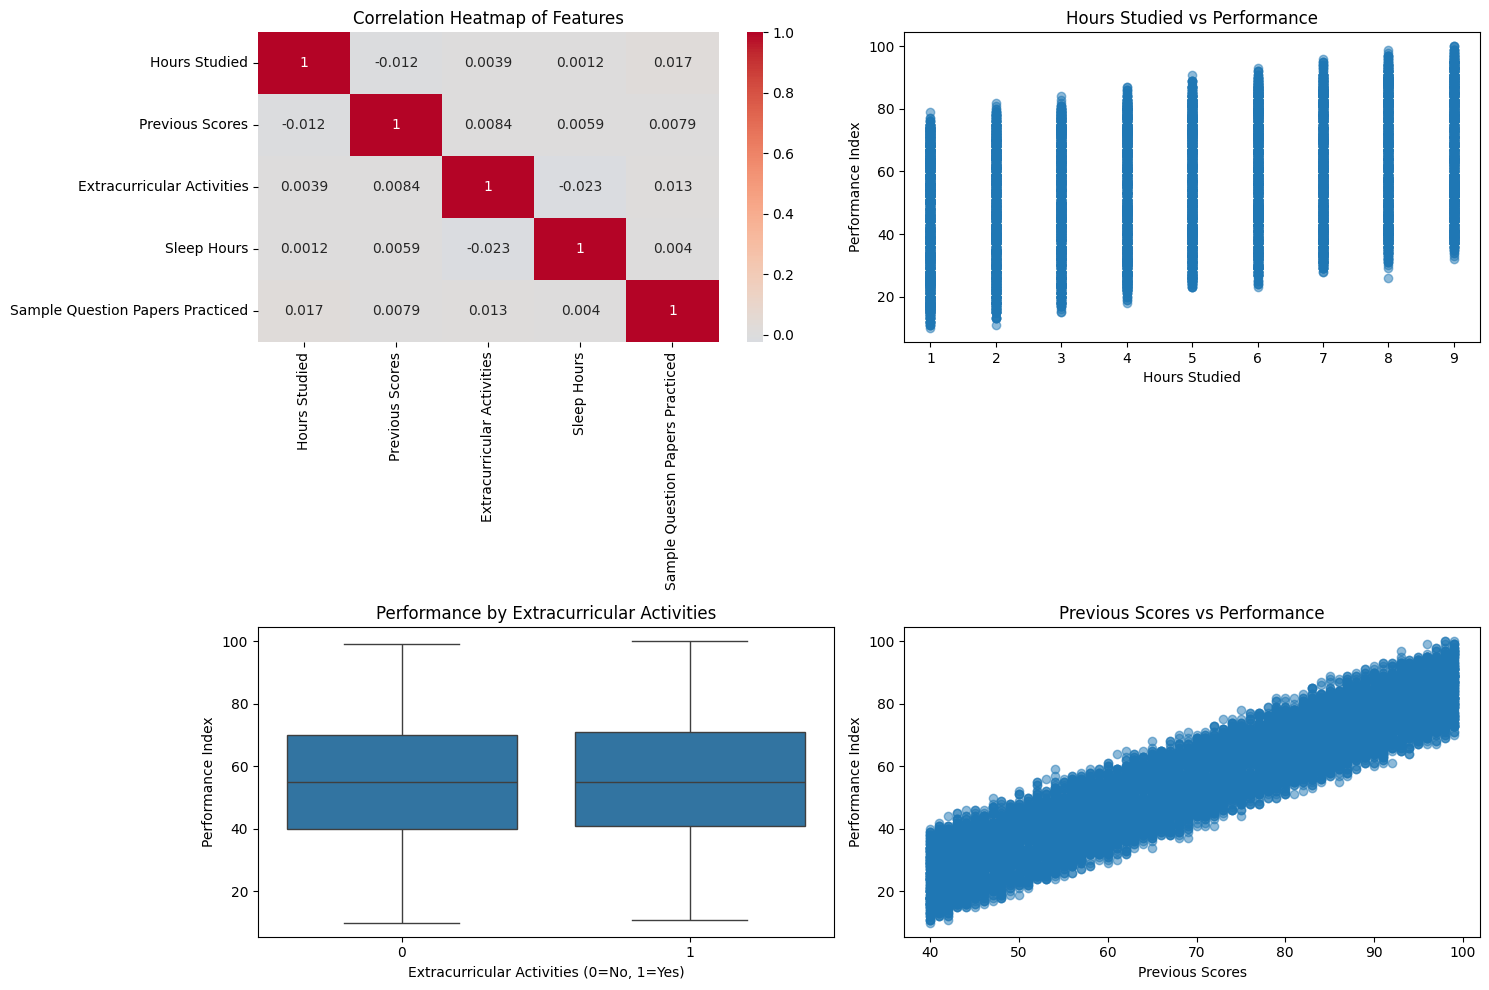

Text(0.5, 1.0, 'Practice Questions vs Performance')

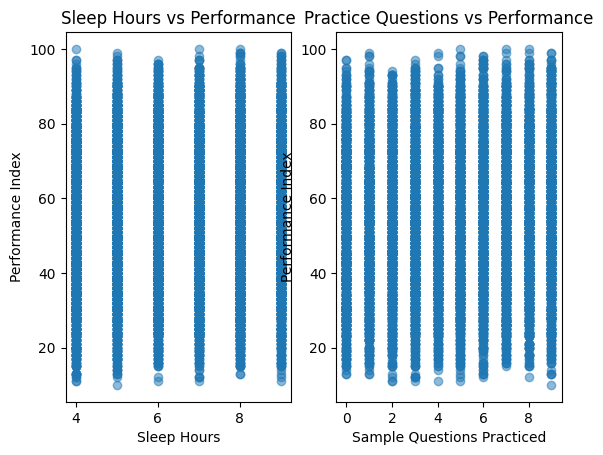

In [90]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')

plt.subplot(2, 2, 2)
plt.scatter(X['Hours Studied'], Y['Performance Index'], alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance')

plt.subplot(2, 2, 3)
sns.boxplot(x=X['Extracurricular Activities'], y=y['Performance Index'])
plt.xlabel('Extracurricular Activities (0=No, 1=Yes)')
plt.ylabel('Performance Index')
plt.title('Performance by Extracurricular Activities')

plt.subplot(2, 2, 4)
plt.scatter(X['Previous Scores'], y['Performance Index'], alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance')

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
plt.scatter(X['Sleep Hours'], y['Performance Index'], alpha=0.5)
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours vs Performance')

plt.subplot(1, 2, 2)
plt.scatter(X['Sample Question Papers Practiced'], y['Performance Index'], alpha=0.5)
plt.xlabel('Sample Questions Practiced')
plt.ylabel('Performance Index')
plt.title('Practice Questions vs Performance')

